<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/algorithm/RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

基本設定

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

誤差分布は外れ値が大きいコーシー分布

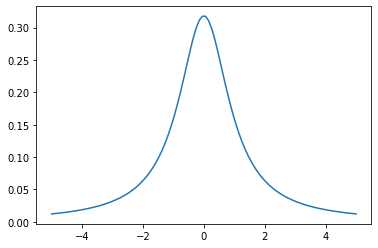

In [48]:
import numpy as np

def cauchy(x: np.ndarray):
    return 1/np.pi/(1+x*x)

x = np.linspace(-5, 5, 100)
y = cauchy(x)

plt.plot(x, y)
plt.show()

サンプルデータ生成

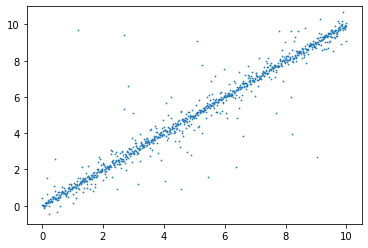

In [49]:
point_num: int = 1000

errors = np.random.standard_cauchy(point_num)
x = np.linspace(0, 10, point_num)
y = x + errors / 10

points = np.vstack([x, y]).T

plt.scatter(x, y, s=0.5)
plt.ylim(-1, 11)
plt.show()

ランダムサンプリング

In [50]:
index_mat = np.random.randint(0, point_num, (point_num, 2))
print(index_mat)

[[466 446]
 [187 685]
 [386 145]
 ...
 [ 12 823]
 [833 783]
 [227 536]]


In [51]:
# 転置前の成分数は (axis, samples, points)
samples_tensor = np.array([x[index_mat], y[index_mat]]).transpose(1, 0, 2)

print(samples_tensor.shape)
print(samples_tensor)

(1000, 2, 2)
[[[4.66466466 4.46446446]
  [4.72902026 4.65447923]]

 [[1.87187187 6.85685686]
  [2.68702408 6.31004759]]

 [[3.86386386 1.45145145]
  [4.01649418 1.37920374]]

 ...

 [[0.12012012 8.23823824]
  [0.05066394 8.12702927]]

 [[8.33833834 7.83783784]
  [8.20010827 7.86176438]]

 [[2.27227227 5.36536537]
  [2.13859148 5.43464098]]]


傾きと切片計算

In [52]:
def get_params(samples):
    point1, point2 = samples[0], samples[1]
    grad = (point2[1] - point1[1])/(point2[0] - point1[0])
    line_slice = point1[1] - grad * point1[0]
    return grad, line_slice

params_tensor = np.array([get_params(sample) for sample in samples_tensor])

inlier の数を計算 → 最も良い候補を選択

In [53]:
def get_distances(params, points):
    y_est = params[0] * points[:, 0] + params[1]
    distances = np.abs(points[:, 1] - y_est)
    return distances

distances_tensor = np.array([
    get_distances(params, points) for params in params_tensor])

distance_th = 0.3
inlier_bool_tensor = np.array([
    distances < distance_th
    for distances in distances_tensor
])
inlier_num_array = np.array([
    np.sum(inlier_bool)
    for inlier_bool in inlier_bool_tensor
])

best_idx = np.argmax(inlier_num_array)
print(best_idx)

177


結果を確認

In [54]:
best_params = params_tensor[best_idx]
inlier_idx = np.arange(point_num)[inlier_bool_tensor[best_idx]]
outlier_idx = np.arange(point_num)[~inlier_bool_tensor[best_idx]]

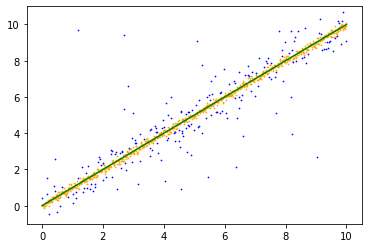

In [55]:
plt.scatter(points[inlier_idx, 0], points[inlier_idx, 1], s=0.5, color="orange")
plt.scatter(points[outlier_idx, 0], points[outlier_idx, 1], s=0.5, color="blue")

plt.plot(points[:, 0], best_params[0]*points[:, 0]+best_params[1],
         color="green")
plt.ylim(-1, 11)
plt.show()

再フィッティング